# Smoothing with PySINDy.
A short example showing how to use the PySINDy functions to smooth neural signals.

In [149]:
import numpy as np
import matplotlib.pyplot as plt
from derivative import dxdt

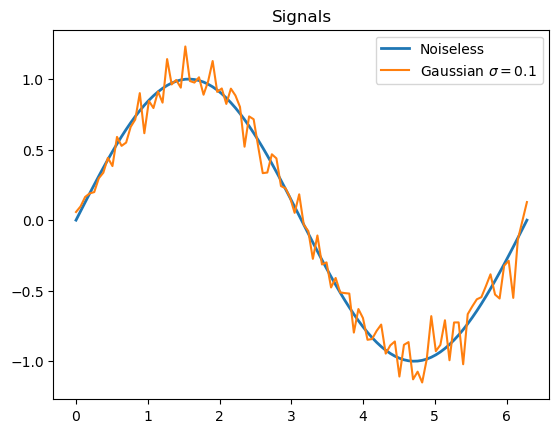

In [150]:
# Generate data
sigma = 0.1
t = np.linspace(0, 2 * np.pi, 100)
x_orig = np.sin(t)
x_noisy = x_orig + np.random.normal(scale=sigma, size=t.size)  # add noise

# Plot the signals
fig, ax = plt.subplots()
ax.plot(t, x_orig, label="Noiseless", linewidth=2)
ax.plot(t, x_noisy, label=f"Gaussian $\sigma = {sigma}$")
ax.legend()
ax.set_title("Signals")
plt.show()


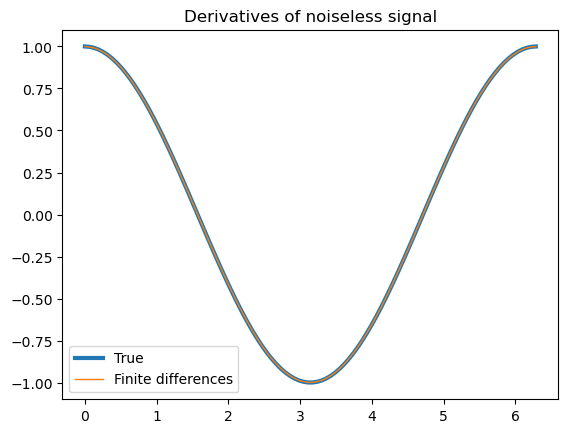

In [151]:
# Compute derivatives of the original signal
dt = np.diff(t, prepend=t[0] - np.diff(t)[0])
dxdt_true = np.cos(t)  # ground-truth derivative
dxdt_hand_orig = (
    np.diff(x_orig, prepend=x_orig[0] - np.diff(x_orig)[0]) / dt
)  # hand-computed derivative
dxdt_findiff_orig = dxdt(
    x_orig, t, kind="finite_difference", k=1
)  # finite differences derivative

# Plot and compare the derivatives
fig, ax = plt.subplots()
ax.plot(t, dxdt_true, label="True", linewidth=3)
# ax.plot(t, dxdt_hand_orig, label="Hand-computed")
ax.plot(t, dxdt_findiff_orig, label="Finite differences", linewidth=1)
ax.legend()
ax.set_title("Derivatives of noiseless signal")
plt.show()


/Users/quileesimeon/opt/anaconda3/envs/worm-graph/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.134e-02, tolerance: 3.973e-03
  model = cd_fast.enet_coordinate_descent(


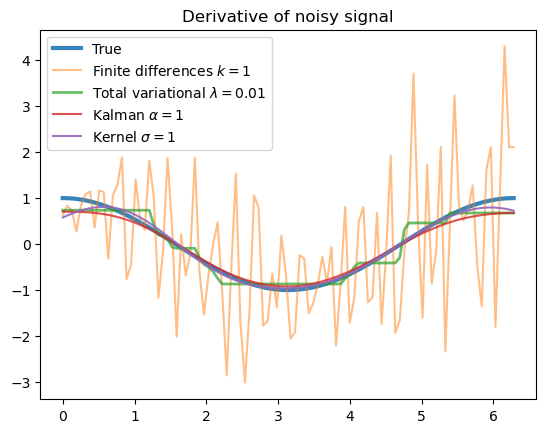

In [152]:
# Compute derivatives of the noisy signal
dt = np.diff(t, prepend=t[0] - np.diff(t)[0])
dxdt_true = np.cos(t)  # ground-truth derivative
dxdt_hand_noisy = (
    np.diff(x_noisy, prepend=x_noisy[0] - np.diff(x_noisy)[0]) / dt
)  # hand-computed derivative
dxdt_findiff_noisy = dxdt(
    x_noisy, t, kind="finite_difference", k=1
)  # finite differences derivative
dxdt_savgol_noisy = dxdt(
    x_noisy, t, kind="savitzky_golay", left=0.5, right=0.5, order=3
)  # savitzky-golay derivative
dxdt_totalvar_noisy = dxdt(
    x_noisy, t, kind="trend_filtered", order=0, alpha=1e-2
)  # total variational derivative
dxdt_kalman_noisy = dxdt(x_noisy, t, kind="kalman", alpha=1)  # kalman filter derivative
dxdt_kernel_noisy = dxdt(
    x_noisy, t, kind="kernel", sigma=1, lmbd=0.1, kernel="rbf"
)  # kernel derivative

# Plot and compare the derivatives
fig, ax = plt.subplots()
ax.plot(t, dxdt_true, label="True", linewidth=3, alpha=0.9)
# ax.plot(t, dxdt_hand_noisy, label="Hand-computed $O(1)$", alpha=0.4)
ax.plot(t, dxdt_findiff_noisy, label="Finite differences $k=1$", alpha=0.5)
# ax.plot(t, dxdt_savgol_noisy, label="Savitzky-Golay $p=3$", linewidth=2, alpha=0.6)
ax.plot(
    t,
    dxdt_totalvar_noisy,
    label="Total variational $\lambda=0.01$",
    linewidth=2,
    alpha=0.7,
)
ax.plot(t, dxdt_kalman_noisy, label="Kalman $\\alpha=1$", alpha=0.8)
ax.plot(t, dxdt_kernel_noisy, label="Kernel $\sigma=1$", alpha=0.9)
ax.legend()
ax.set_title("Derivative of noisy signal")
plt.show()


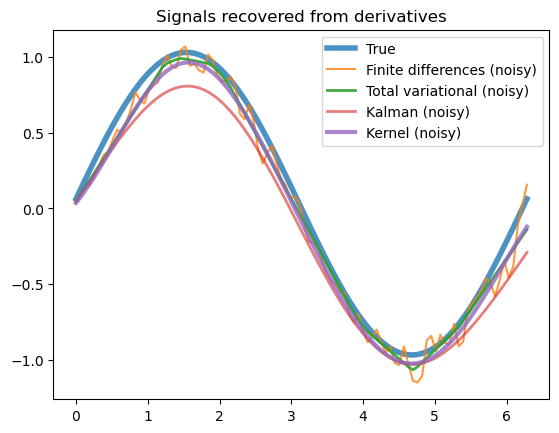

In [153]:
# Integrate derivatives to recover signal
fig, ax = plt.subplots()
ax.plot(t, np.cumsum(dxdt_true) * dt, label="True", alpha=0.8, linewidth=4)
# ax.plot(
#     t,
#     np.cumsum(dxdt_findiff_orig) * dt,
#     label="Finite differences (original)",
#     linewidth=1,
# )
ax.plot(
    t, np.cumsum(dxdt_findiff_noisy) * dt, label="Finite differences (noisy)", alpha=0.8
)
ax.plot(
    t,
    np.cumsum(dxdt_totalvar_noisy) * dt,
    label="Total variational (noisy)",
    linewidth=2,
    alpha=0.9,
)
ax.plot(
    t, np.cumsum(dxdt_kalman_noisy) * dt, label="Kalman (noisy)", alpha=0.6, linewidth=2
)
ax.plot(
    t, np.cumsum(dxdt_kernel_noisy) * dt, label="Kernel (noisy)", alpha=0.8, linewidth=3
)
ax.legend()
ax.set_title("Signals recovered from derivatives")
plt.show()